-2.0
Upper OuterCoil: I= 0.000, V = 0.000124+0.334032j 
Lower OuterCoil: I= 0.000, V = 0.000275+0.455176j 
InnerCoil: I= 0.020, V = 0.10536192+0.71137803j 
-1.6
Upper OuterCoil: I= 0.000, V = 0.000140+0.347598j 
Lower OuterCoil: I= 0.000, V = 0.000263+0.445692j 
InnerCoil: I= 0.020, V = 0.10536510+0.71161489j 
-1.2
Upper OuterCoil: I= 0.000, V = 0.000155+0.361075j 
Lower OuterCoil: I= 0.000, V = 0.000249+0.435380j 
InnerCoil: I= 0.020, V = 0.10536287+0.71138528j 
-0.7999999999999998
Upper OuterCoil: I= 0.000, V = 0.000171+0.374423j 
Lower OuterCoil: I= 0.000, V = 0.000235+0.424293j 
InnerCoil: I= 0.020, V = 0.10536548+0.71162309j 
-0.3999999999999999
Upper OuterCoil: I= 0.000, V = 0.000188+0.387510j 
Lower OuterCoil: I= 0.000, V = 0.000219+0.412555j 
InnerCoil: I= 0.020, V = 0.10536511+0.71160762j 
0.0
Upper OuterCoil: I= 0.000, V = 0.000203+0.400255j 
Lower OuterCoil: I= 0.000, V = 0.000204+0.400267j 
InnerCoil: I= 0.020, V = 0.10536414+0.71151597j 
0.40000000000000036
Upper OuterCoil

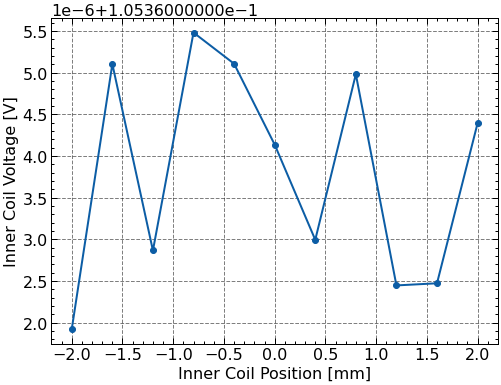

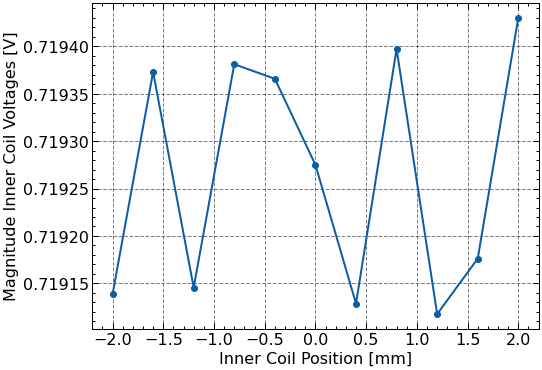

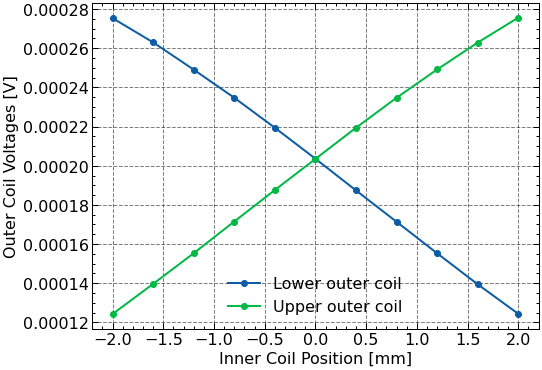

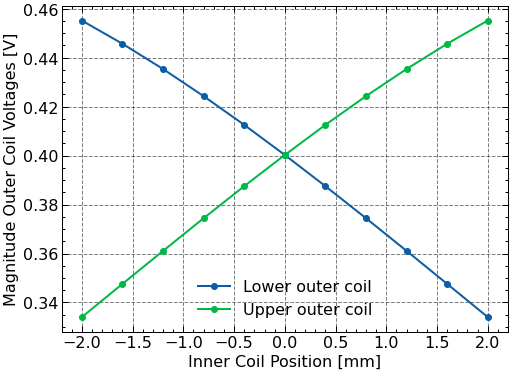

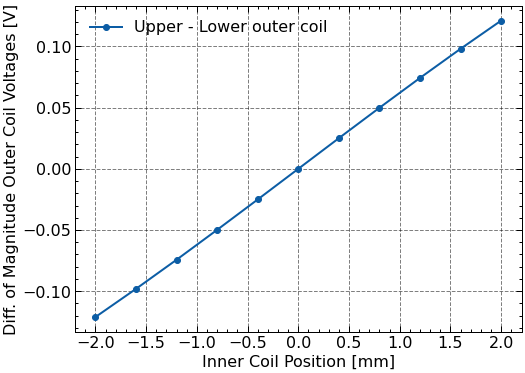

[1.42375568 1.42379955 1.42375586 1.4238007  1.42379806 1.42378073
 1.4237522  1.42380471 1.42375068 1.42376271 1.42381236]
[1.57019133 1.57020623 1.57022422 1.57024313 1.57026454 1.57028774
 1.5703128  1.57033869 1.57036636 1.57039523 1.57042413]
[1.57042441 1.5703946  1.57036623 1.5703383  1.57031227 1.57028796
 1.57026455 1.57024314 1.57022404 1.57020644 1.5701907 ]
Phase offset: -0.14643564894923733 -0.14637834365489955


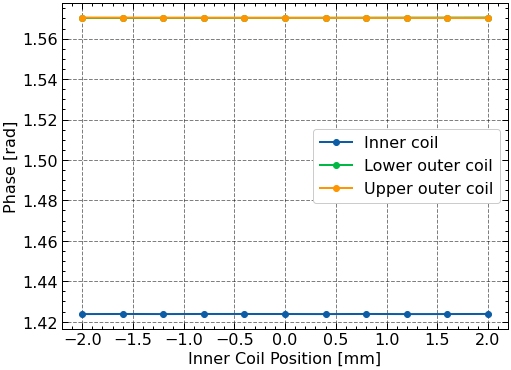

Fitted slope of the function: 7.646184640510116
[ 7.64618464e+00 -5.60510781e-04]


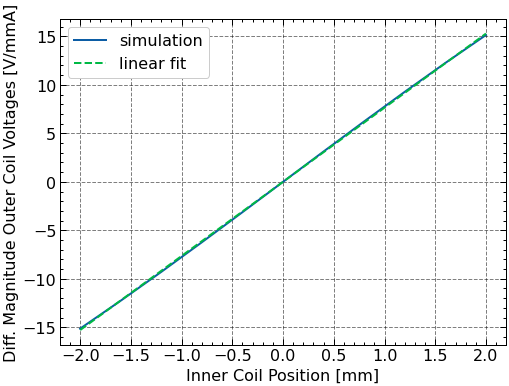

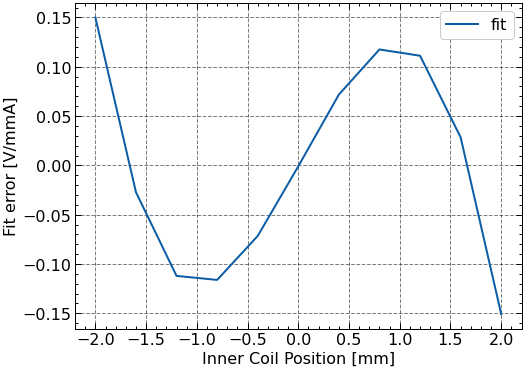

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-1.52929298e+01 -1.22344559e+01 -9.17598208e+00 -6.11750822e+00
 -3.05903437e+00 -5.60510781e-04  3.05791335e+00  6.11638720e+00
  9.17486106e+00  1.22333349e+01  1.52918088e+01]
[-1.51430463e+01 -1.22617131e+01 -9.28808594e+00 -6.23367388e+00
 -3.13061885e+00 -1.49085420e-03  3.12972131e+00  6.23391833e+00
  9.28603077e+00  1.22617982e+01  1.51409945e+01]


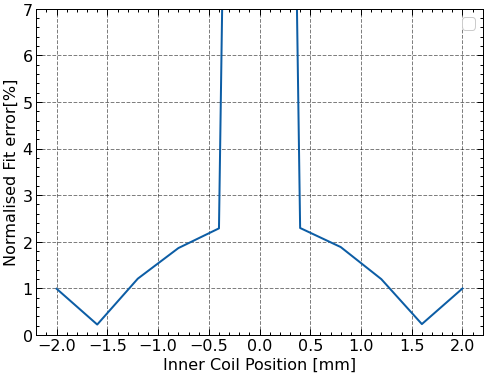

In [34]:
import design
import femm
import numpy as np
import cmath
import scipy.optimize as opt
import matplotlib.pyplot as plt
import shutil

femm.openfemm()
femm.newdocument(0)

outputfile = 'MirrorTowerInterfilter_10kHz_20mA_32AWG_10mm_6_5_5.out'
NSteps = 10
StepSize = 0.4
InnCoil_Offset = -2.0

sensor = design.Sensortype(0.02, 10000, 0)
femm.mi_probdef(sensor.para()[1], 'millimeters', 'axi', 1.0e-10)
wire = design.Wiretype("32 AWG", "32 AWG")
geo = design.Geometry(inn_ht = 8, inn_rad = 7, inn_layers = 6, inn_dist = 0, out_ht = 10, out_rad = 12, out_layers = 5, out_dist = 10, mag_len = 40, mag_dia = 10, ver_shi = 0)
data_file = "outrad13.txt"

class Position():
    def __init__(self):
        pass

    def inncoil(self):
        InnCoil_OutRadius = geo.inncoil()[1] + ((wire.prop32()[0] + wire.prop32()[1] * 2) * geo.inncoil()[2])
        InnCoil_Lowend = (geo.inncoil()[3] - geo.inncoil()[0]) / 2
        InnCoil_Uppend = InnCoil_Lowend + geo.inncoil()[0]
        InnCoil_NrWind_p_Layer = (geo.inncoil()[0]) / (wire.prop32()[0] + wire.prop32()[1] * 2)
        InnCoil_NrWindings = InnCoil_NrWind_p_Layer * geo.inncoil()[2]
        InnCoil_Circuit = "InnCoil_Circuit"
        return [InnCoil_OutRadius, InnCoil_Lowend, InnCoil_Uppend, InnCoil_NrWind_p_Layer, InnCoil_NrWindings,
                InnCoil_Circuit]

    def upp_outcoil(self):
        UppOutCoil_OutRadius = geo.outcoil()[1] + ((wire.prop32()[0] + wire.prop32()[1] * 2) * geo.outcoil()[2])
        UppOutCoil_LowEnd = (geo.outcoil()[3] - geo.outcoil()[0]) / 2
        UppOutCoil_UppEnd = UppOutCoil_LowEnd + geo.outcoil()[0]
        UppOutCoil_NrWind_p_Layer = (geo.outcoil()[0]) / (wire.prop32()[0] + wire.prop32()[1] * 2)
        UppOutCoil_NrWindings = UppOutCoil_NrWind_p_Layer * geo.outcoil()[2]
        UppOutCoil_Circuit = "UppOutCoil_Circuit"
        return [UppOutCoil_OutRadius, UppOutCoil_LowEnd, UppOutCoil_UppEnd, UppOutCoil_NrWind_p_Layer,
                UppOutCoil_NrWindings, UppOutCoil_Circuit]

    def low_outcoil(self):
        LowOutCoil_OutRadius = geo.outcoil()[1] + ((wire.prop32()[0] + wire.prop32()[1] * 2) * geo.outcoil()[2])
        LowOutCoil_UppEnd = -1 * ((geo.outcoil()[3] - geo.outcoil()[0]) / 2)
        LowOutCoil_LowEnd = LowOutCoil_UppEnd - geo.outcoil()[0]
        LowOutCoil_NrWind_p_Layer = (LowOutCoil_UppEnd - LowOutCoil_LowEnd) / (
                    wire.prop32()[0] + wire.prop32()[1] * 2)
        LowOutCoil_NrWindings = LowOutCoil_NrWind_p_Layer * geo.outcoil()[2]
        LowOutCoil_Circuit = "LowOutCoil_Circuit"
        return [LowOutCoil_OutRadius, LowOutCoil_UppEnd, LowOutCoil_LowEnd, LowOutCoil_NrWind_p_Layer,
                LowOutCoil_NrWindings, LowOutCoil_Circuit]
position = Position()

class Length():
    def __init__(self):
        pass

    def inncoil(self):
        InnCoil_TotalWire = 0
        for i in range(0, geo.inncoil()[2]):
            # circ = 2*np.pi*InnCoil_InRadius+i*(InnCoil_WireDiam+InnCoil_WireInsul)
            circ = 2 * np.pi * (geo.inncoil()[1] + i * (wire.prop32()[0] + wire.prop32()[1] * 2))
            InnCoil_TotalWire += circ * position.inncoil()[3]
        print("Total length of wire (mm):", InnCoil_TotalWire)
        print("\n")
        return InnCoil_TotalWire

    def upp_outcoil(self):
        UppOutCoil_TotalWire = 0
        for i in range(0, geo.outcoil()[2]):
            # circ = 2*np.pi*(UppOutCoil_InRadius+i*(UppOutCoil_WireDiam+UppOutCoil_WireInsul))
            circ = 2 * np.pi * (geo.outcoil()[1] + i * (wire.prop32()[0] + wire.prop32()[1] * 2))
            UppOutCoil_TotalWire += circ * position.upp_outcoil()[3]
        print("Total length of wire (mm):", UppOutCoil_TotalWire)
        print("\n")
        return UppOutCoil_TotalWire

    def low_outcoil(self):
        LowOutCoil_TotalWire = 0
        for i in range(0, geo.outcoil()[2]):
            # circ = 2*np.pi*LowOutCoil_InRadius+i*(LowOutCoil_WireDiam+LowOutCoil_WireInsul)
            circ = 2 * np.pi * (geo.outcoil()[1] + i * (wire.prop32()[0] + wire.prop32()[1] * 2))
            LowOutCoil_TotalWire += circ * position.low_outcoil()[3]
        print("Total length of wire (mm):", LowOutCoil_TotalWire)
        print("\n")
        return LowOutCoil_TotalWire
length = Length()

class Modelling():
    def __init__(self):
        pass
    # InnerCoil Structure
    femm.mi_drawrectangle(geo.inncoil()[1], position.inncoil()[2], position.inncoil()[0], position.inncoil()[1])
    femm.mi_addcircprop(position.inncoil()[5], sensor.para()[0], 1)

    if wire.inncoil_material == "31 AWG":
        femm.mi_addmaterial('31 AWG', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.2261)
    if wire.inncoil_material == "32 AWG":
        femm.mi_getmaterial(wire.inncoil_material)

    femm.mi_clearselected()
    femm.mi_selectrectangle(geo.inncoil()[1], position.inncoil()[2], position.inncoil()[0], position.inncoil()[1], 4)
    femm.mi_setgroup(1)
    femm.mi_clearselected()
    femm.mi_addblocklabel(geo.inncoil()[1] + wire.prop32()[1], position.inncoil()[1] + (geo.inncoil()[0] / 2))
    femm.mi_selectlabel(geo.inncoil()[1] + wire.prop32()[1], position.inncoil()[1] + (geo.inncoil()[0] / 2))
    femm.mi_setblockprop(wire.prop32()[2], 1, 0, position.inncoil()[5], 0, 1, position.inncoil()[4])
    femm.mi_clearselected()

    # UpperOutCoil Structure
    femm.mi_drawrectangle(geo.outcoil()[1], position.upp_outcoil()[2], position.upp_outcoil()[0],
                          position.upp_outcoil()[1])
    femm.mi_addcircprop(position.upp_outcoil()[5], sensor.para()[2], 1)

    if wire.outcoil_material == "31 AWG":
        femm.mi_addmaterial('31 AWG', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.2261)
    if wire.outcoil_material == "32 AWG":
        femm.mi_getmaterial(wire.inncoil_material)

    femm.mi_clearselected()
    femm.mi_selectrectangle(geo.outcoil()[1], position.upp_outcoil()[2], position.upp_outcoil()[0],
                            position.upp_outcoil()[1], 4)
    femm.mi_setgroup(3)
    femm.mi_clearselected()
    femm.mi_addblocklabel(geo.outcoil()[1] + wire.prop32()[1], position.upp_outcoil()[2] - (geo.outcoil()[0] * 0.5))
    femm.mi_selectlabel(geo.outcoil()[1] + wire.prop32()[1], position.upp_outcoil()[2] - (geo.outcoil()[0] * 0.5))
    femm.mi_setblockprop(wire.prop32()[2], 0, 0.1, position.upp_outcoil()[5], 0, 3, position.upp_outcoil()[4])
    femm.mi_clearselected()

    # LowerOutCoil Structure
    femm.mi_drawrectangle(geo.outcoil()[1], position.low_outcoil()[1], position.low_outcoil()[0],
                          position.low_outcoil()[2])
    femm.mi_addcircprop(position.low_outcoil()[5], -sensor.para()[2], 1)

    if wire.outcoil_material == "31 AWG":
        femm.mi_addmaterial('31 AWG', 1, 1, 0, 0, 58, 0, 0, 1, 3, 0, 0, 1, 0.2261)
    if wire.outcoil_material == "32 AWG":
        femm.mi_getmaterial(wire.inncoil_material)

    femm.mi_clearselected()
    femm.mi_selectrectangle(geo.outcoil()[1], position.low_outcoil()[1], position.low_outcoil()[0],
                            position.low_outcoil()[2], 4)
    femm.mi_setgroup(4)
    femm.mi_clearselected()
    femm.mi_addblocklabel(geo.outcoil()[1] + wire.prop32()[0], position.low_outcoil()[2] + (geo.outcoil()[0] * 0.5))
    femm.mi_selectlabel(geo.outcoil()[1] + wire.prop32()[0], position.low_outcoil()[2] + (geo.outcoil()[0] * 0.5))
    femm.mi_setblockprop(wire.prop32()[2], 0, 0.1, position.low_outcoil()[5], 0, 4, position.low_outcoil()[4])
    femm.mi_clearselected()

    # AirSurrounding Structure
    AirSpaceRadius_1 = 100
    AirSpaceRadius_2 = 300
    BC_Name = "Outside"
    BC_Group = 10
    # Airspace1
    femm.mi_drawline(0, AirSpaceRadius_1, 0, -AirSpaceRadius_1)
    femm.mi_drawarc(0, -AirSpaceRadius_1, 0, AirSpaceRadius_1, 180, 2)
    femm.mi_getmaterial("Air")
    femm.mi_clearselected()
    femm.mi_addblocklabel(AirSpaceRadius_1 / 4, AirSpaceRadius_1 / 2)
    femm.mi_selectlabel(AirSpaceRadius_1 / 4, AirSpaceRadius_1 / 2)
    femm.mi_setblockprop("Air", 0, 0.5, '', 0, 0, 0)
    femm.mi_clearselected()
    # Airspace2
    femm.mi_drawline(0, AirSpaceRadius_2, 0, -AirSpaceRadius_2)
    femm.mi_drawarc(0, -AirSpaceRadius_2, 0, AirSpaceRadius_2, 180, 2)
    femm.mi_getmaterial("Air")
    femm.mi_clearselected()
    femm.mi_addblocklabel(AirSpaceRadius_2 / 2, AirSpaceRadius_2 / 1.2)
    femm.mi_selectlabel(AirSpaceRadius_2 / 2, AirSpaceRadius_2 / 1.2)
    femm.mi_setblockprop("Air", 1, 0, '', 0, 0, 0)
    femm.mi_clearselected()
    # Boundary properties
    femm.mi_addboundprop(BC_Name, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
    femm.mi_clearselected()
    femm.mi_selectarcsegment(0, AirSpaceRadius_2)
    femm.mi_setarcsegmentprop(2, BC_Name, 0, BC_Group)
    femm.mi_clearselected()

    UppOutCoil_Voltages = np.zeros(NSteps + 1).astype(complex)
    LowOutCoil_Voltages = np.zeros(NSteps + 1).astype(complex)
    InnCoil_Voltages = np.zeros(NSteps + 1).astype(complex)
    InnCoil_Positions = np.zeros(NSteps + 1)
    MetaData = np.zeros(NSteps + 1)

    femm.mi_selectgroup(1)
    femm.mi_selectgroup(2)
    femm.mi_movetranslate(0, InnCoil_Offset)
    femm.mi_clearselected()
modelled = Modelling()

class Computation_loop():
    def __init__(self):
        pass
    for i in range(0, NSteps + 1):

        print(InnCoil_Offset + StepSize * i)
        modelled.InnCoil_Positions[i] = InnCoil_Offset + (StepSize * i)

        # Now, the finished input geometry can be displayed.
        # femm.mi_zoomnatural()
        femm.mi_zoom(-2, -50, 50, 50)
        femm.mi_refreshview()

        # We have to give the geometry a name before we can analyze it.
        femm.mi_saveas('LVDT position_ETpf_LIP.fem')

        # Now,analyze the problem and load the solution when the analysis is finished
        femm.mi_analyze()
        femm.mi_loadsolution()

        if NSteps == 0:
            # Show Density Plot:
            femm.mo_showdensityplot(1, 0, 0.0001, 1.0E-9, "bmag")
            # --legend,	(0=hide, 1=show)
            # --gscale,	(0=color, 1=greyscale)
            # --upper_B,	(upperlimit for display)
            # --lower_B,	(lowerlimit for display)
            # --type		("bmag", "breal", "bimag" FluxDensity)
            # --			("hmag", "hreal", "himag" FieldIntensity)
            # --			("jmag", "jreal", "jimag" CurrentDensity)
            femm.mo_zoom(-2, -50, 50, 50)
            femm.mo_refreshview()

        UppOutCoil_I, UppOutCoil_V, UppOutCoil_FluxLink = femm.mo_getcircuitproperties(position.upp_outcoil()[5])
        print("Upper OuterCoil: I= {:.3f}, V = {:.6f} ".format(UppOutCoil_I, UppOutCoil_V))
        modelled.UppOutCoil_Voltages[i] = UppOutCoil_V

        LowOutCoil_I, LowOutCoil_V, LowOutCoil_FluxLink = femm.mo_getcircuitproperties(position.low_outcoil()[5])
        print("Lower OuterCoil: I= {:.3f}, V = {:.6f} ".format(LowOutCoil_I, LowOutCoil_V))
        modelled.LowOutCoil_Voltages[i] = LowOutCoil_V

        InnCoil_I, InnCoil_V, InnCoil_FluxLink = femm.mo_getcircuitproperties(position.inncoil()[5])
        print("InnerCoil: I= {:.3f}, V = {:.8f} ".format(InnCoil_I, InnCoil_V))
        modelled.InnCoil_Voltages[i] = InnCoil_V

        # Translate inner coil to different distance
        femm.mi_selectgroup(1)
        femm.mi_movetranslate(0, StepSize)
        femm.mi_clearselected()
loop = Computation_loop()

print(modelled.InnCoil_Positions)
print(modelled.UppOutCoil_Voltages)
print(modelled.LowOutCoil_Voltages)
print(modelled.InnCoil_Voltages)

if NSteps > 2:
    modelled.MetaData[0] = NSteps
    modelled.MetaData[1] = StepSize
    modelled.MetaData[2] = sensor.para()[2]
    np.savetxt(outputfile,
               (modelled.InnCoil_Positions, modelled.UppOutCoil_Voltages, modelled.LowOutCoil_Voltages, modelled.InnCoil_Voltages, modelled.MetaData))

plt.style.use(['science', 'grid', 'notebook'])

class Results():
    def __init__(self):
        pass
    plt.plot(modelled.InnCoil_Positions, modelled.InnCoil_Voltages.real, 'o-')
    plt.ylabel('Inner Coil Voltage [V]')
    plt.xlabel('Inner Coil Position [mm]')
    #plt.savefig("inn_vol.png")
    #shutil.move("inn_vol.png", r"C:\Users\kumar\OneDrive\Desktop\pi\lvdt\small, large ip\small_IP\outwidth variation\outwid=13.5_0")
    plt.show()

    plt.plot(modelled.InnCoil_Positions, abs(modelled.InnCoil_Voltages), 'o-')
    plt.ylabel('Magnitude Inner Coil Voltages [V]')
    plt.xlabel('Inner Coil Position [mm]')
    #plt.savefig("inn_mag_vol.png")
    #shutil.move("inn_mag_vol.png", r"C:\Users\kumar\OneDrive\Desktop\pi\lvdt\small, large ip\small_IP\outwidth variation\outwid=13.5_0")
    plt.show()

    plt.plot(modelled.InnCoil_Positions, modelled.LowOutCoil_Voltages.real, 'o-', label="Lower outer coil")
    plt.plot(modelled.InnCoil_Positions, modelled.UppOutCoil_Voltages.real, 'o-', label="Upper outer coil")
    plt.ylabel('Outer Coil Voltages [V]')
    plt.xlabel('Inner Coil Position [mm]')
    plt.legend(frameon=False)
    #plt.savefig("out_vol.png")
    #shutil.move("out_vol.png", r"C:\Users\kumar\OneDrive\Desktop\pi\lvdt\small, large ip\small_IP\outwidth variation\outwid=13.5_0")
    plt.show()

    plt.plot(modelled.InnCoil_Positions, abs(modelled.LowOutCoil_Voltages), 'o-', label="Lower outer coil")
    plt.plot(modelled.InnCoil_Positions, abs(modelled.UppOutCoil_Voltages), 'o-', label="Upper outer coil")
    plt.ylabel('Magnitude Outer Coil Voltages [V]')
    plt.xlabel('Inner Coil Position [mm]')
    plt.legend(frameon=False)
    #plt.savefig("abs_low,out_vol.png")
    #shutil.move("abs_low,out_vol.png", r"C:\Users\kumar\OneDrive\Desktop\pi\lvdt\small, large ip\small_IP\outwidth variation\outwid=13.5_0")
    plt.show()

    plt.plot(modelled.InnCoil_Positions, abs(modelled.UppOutCoil_Voltages) - abs(modelled.LowOutCoil_Voltages), 'o-',
             label="Upper - Lower outer coil", )
    plt.ylabel('Diff. of Magnitude Outer Coil Voltages [V]')
    plt.xlabel('Inner Coil Position [mm]')
    plt.legend(frameon=False)
    #plt.savefig("vol_diff.png")
    #shutil.move("vol_diff.png", r"C:\Users\kumar\OneDrive\Desktop\pi\lvdt\small, large ip\small_IP\outwidth variation\outwid=13.5_0")
    plt.show()

    InnCoil_Phases = np.angle(modelled.InnCoil_Voltages)
    LowOutCoil_Phases = np.angle(modelled.LowOutCoil_Voltages)
    UppOutCoil_Phases = np.angle(modelled.UppOutCoil_Voltages)
    print(InnCoil_Phases)
    print(LowOutCoil_Phases)
    print(UppOutCoil_Phases)
    print("Phase offset:", InnCoil_Phases[0] - LowOutCoil_Phases[0], InnCoil_Phases[NSteps] - UppOutCoil_Phases[NSteps])

    plt.plot(modelled.InnCoil_Positions, InnCoil_Phases, 'o-', label="Inner coil")
    plt.plot(modelled.InnCoil_Positions, LowOutCoil_Phases, 'o-', label="Lower outer coil")
    plt.plot(modelled.InnCoil_Positions, UppOutCoil_Phases, 'o-', label="Upper outer coil")
    plt.ylabel('Phase [rad]')
    plt.xlabel('Inner Coil Position [mm]')
    plt.legend()
    #plt.savefig("phase.png")
    #shutil.move("phase.png", r"C:\Users\kumar\OneDrive\Desktop\pi\lvdt\small, large ip\small_IP\outwidth variation\outwid=13.5_0")
    plt.show()

    Norm_OutCoil_Signals = (abs(modelled.UppOutCoil_Voltages) - abs(modelled.LowOutCoil_Voltages)) / StepSize / sensor.para()[0]

    def linfunc(x, a, b):
        return a * x + b
        # ydata: Norm_OutCoil_Signals
        # xdata: InnCoil_Position

    optimizedParameters, pcov = opt.curve_fit(linfunc, modelled.InnCoil_Positions, Norm_OutCoil_Signals);
    print("Fitted slope of the function:", optimizedParameters[0])
    fitted_Norm_OutCoil_Signals = linfunc(modelled.InnCoil_Positions, *optimizedParameters)
    print(optimizedParameters)

    # InnCoil_Positions1 = modelled.InnCoil_Positions[8:13]
    # Norm_OutCoil_Signals1 = Norm_OutCoil_Signals[8:13]
    # optimizedparameters1, pcov = opt.curve_fit(linfunc, InnCoil_Positions1, Norm_OutCoil_Signals1)
    # print("Fitted slope of the function:", optimizedparameters1[0])
    # fitted_Norm_OutCoil_Signals1 = linfunc(InnCoil_Positions1, *optimizedparameters1)
    # print(optimizedparameters1)

    plt.plot(modelled.InnCoil_Positions, Norm_OutCoil_Signals, label="simulation")
    plt.plot(modelled.InnCoil_Positions, fitted_Norm_OutCoil_Signals, '--', label="linear fit")
    #plt.plot(InnCoil_Positions1, fitted_Norm_OutCoil_Signals1, '--', label="fit (-1,1)")
    plt.ylabel('Diff. Magnitude Outer Coil Voltages [V/mmA]')
    plt.xlabel('Inner Coil Position [mm]')
    #plt.ylim(0,20)
    plt.legend()
    #plt.savefig("linfit_pen3_lar.png")
    #shutil.move("linfit_pen3_lar.png", r"C:\Users\kumar\OneDrive\Desktop\pi\lvdt\small, large ip\small_IP\res\subfit")
    plt.show()

    plt.plot(modelled.InnCoil_Positions, Norm_OutCoil_Signals - fitted_Norm_OutCoil_Signals, label = "fit")
    #plt.plot(modelled.InnCoil_Positions, Norm_OutCoil_Signals - optimizedparameters1[0]*(np.array(modelled.InnCoil_Positions))+optimizedparameters1[1], label="fit (-1,1)")
    plt.ylabel('Fit error [V/mmA]')
    plt.xlabel('Inner Coil Position [mm]')
    plt.legend()
    #plt.savefig("fiterr_pen3_lar.png")
    #shutil.move("fiterr_pen3_lar.png", r"C:\Users\kumar\OneDrive\Desktop\pi\lvdt\small, large ip\small_IP\res\subfit")
    plt.show()

    print(fitted_Norm_OutCoil_Signals)
    print(Norm_OutCoil_Signals)
    fiterror = np.array(Norm_OutCoil_Signals) - np.array(fitted_Norm_OutCoil_Signals)
    norm_fit_error = (abs(fiterror) / abs(np.array(Norm_OutCoil_Signals)))*100

    plt.plot(modelled.InnCoil_Positions, (abs(fiterror) / abs(np.array(Norm_OutCoil_Signals)))*100)
    #plt.plot(modelled.InnCoil_Positions, (abs(np.array(Norm_OutCoil_Signals) - np.array(optimizedparameters1[0]*(np.array(modelled.InnCoil_Positions))+optimizedparameters1[1])) / abs(np.array(Norm_OutCoil_Signals)))*100, label = "fit (-1,1)")
    plt.ylabel('Normalised Fit error[%]')
    plt.xlabel('Inner Coil Position [mm]')
    plt.ylim(0.0, 7)
    plt.legend()
    #plt.savefig("normfiterr_pen3_lar.png")
    #shutil.move("normfiterr_pen3_lar.png", r"C:\Users\kumar\OneDrive\Desktop\pi\lvdt\small, large ip\small_IP\res\subfit")
    plt.show()
results = Results()

class Save_data():
    def __init__(self):
        pass
    #norm_fit_error = (abs(np.array(results.Norm_OutCoil_Signals) - np.array(results.fitted_Norm_OutCoil_Signals)) / abs(np.array(results.Norm_OutCoil_Signals)))*100
    #data = np.column_stack((modelled.InnCoil_Positions, modelled.UppOutCoil_Voltages, modelled.LowOutCoil_Voltages, modelled.InnCoil_Voltages,  results.Norm_OutCoil_Signals, results.fiterror, results.norm_fit_error))
    #np.savetxt(data_file, data)
saved_data = Save_data()
